In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



## Read data

First, let's read both data files and check some rows

In [2]:
titanic_data = pd.read_csv("./input/titanic/train.csv")
test_data = pd.read_csv("./input/titanic/test.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Get some information about dataset

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe some properties of numerical features

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the previous data we have:
* Missing data 3 columns with missing data (Age,Cabin, Embarked)
* Categorical data 5 columns (Name, Sex, Ticket, Cabin, Embarked)
* Numerical data 6 columns ([PassengerId], Survived, Pclass, Age, SibSp, Parch, Fare)

Determine the type of numerical data
* Binary data (Survived)
* Continuous data (Fare, Age)
* Categorical data encoded (Pclass, SibSp, Parch)

In [5]:
print('Survived:', titanic_data.Survived.unique())
print('Pclass:', titanic_data.Pclass.unique())
print('SibSp:', titanic_data.SibSp.unique())
print('Parch:', titanic_data.Parch.unique())


Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


## Missing Data

From original info, we can see missing data in the columns : Age, Cabid and Embarked

In [6]:
print('Null Training data %:\n')

print(titanic_data.isnull().mean())

print('\nNull Test data data %:\n')
print(test_data.isnull().mean())


Null Training data %:

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Null Test data data %:

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


We fill missing data on both, training and test data

In training data:
* Embarked ( 2 values ). We use the mode -most repeated value- to fill missing data
* Cabin (77% missing). We do not have data to fill. So we fill data with 'Missing' label
* Age (19.8% missing). In this case we use mean for the continuous variable

In test data:
* Cabin and age, the same approach than in training data
* Fare, we use mean

In [7]:

## fill missing data 

# embarked, only 2 values not filled. We take the mode as the value to fill na
embarked_mode = titanic_data['Embarked'].mode().values[0]
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
titanic_data['Cabin'].fillna('Missing', inplace=True) 

# age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
test_data['Cabin'].fillna('Missing', inplace=True) 

# age
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)




## Encode categorical data
(Name, Sex, Ticket, Cabin, Embarked)

Let's first try to get an idea of the labels in each feature


In [8]:
print('Sex values:',titanic_data.Sex.unique(), test_data.Sex.unique())
print('Ticket values:',titanic_data.Ticket.unique().size,test_data.Ticket.unique().size)
print('Cabin values:',titanic_data.Cabin.unique().size,test_data.Cabin.unique().size)
print('Embarked values:',titanic_data.Embarked.unique(), test_data.Embarked.unique())

Sex values: ['male' 'female'] ['male' 'female']
Ticket values: 681 363
Cabin values: 148 77
Embarked values: ['S' 'C' 'Q'] ['Q' 'S' 'C']


Let's use onehot encodig for these characteristics having a fix value set. I also want to use the same approach for Pclass attribute. Althought it is already defined as an integer, it is a numeric representation for a class with fixed valueds. We will consider as fixed Sex & Embarked.
For the rest, we will use label encoder

In [9]:


temp = pd.get_dummies(titanic_data[['Sex']]) 
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Sex']]) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Pclass']].astype(str)) 
temp.head()
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Pclass']].astype(str)) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Embarked']]) 
titanic_data= titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Embarked']]) 
test_data= test_data.join(temp)


## Label encoder
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
le.fit(titanic_data['Ticket']) 
titanic_data['Ticket'] = le.transform(titanic_data['Ticket']) 

le = LabelEncoder() 
le.fit(test_data['Ticket']) 
test_data['Ticket'] = le.transform(test_data['Ticket'])


le = LabelEncoder() 
le.fit(titanic_data['Cabin']) 
titanic_data['Cabin'] = le.transform(titanic_data['Cabin']) 

le = LabelEncoder() 
le.fit(test_data['Cabin']) 
test_data['Cabin'] = le.transform(test_data['Cabin'])





In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,146,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,81,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,146,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,55,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,146,S,0,1,0,0,1,0,0,1


## Feature scaling

For Fare & Age we will use a different approach using L2 normalization. L2 normalization will change the distribution of ower data. First let's plot histograms of both properties



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

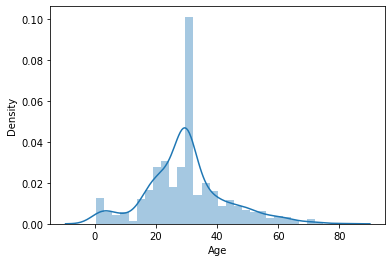

In [12]:
sns.distplot(titanic_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

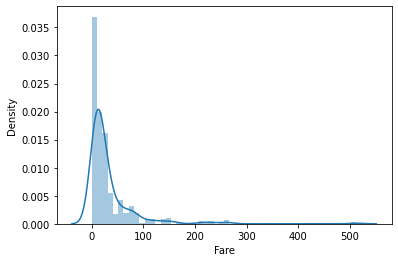

In [13]:
sns.distplot(titanic_data['Fare'])

In [14]:
from sklearn.preprocessing import StandardScaler 


data_unscaled = titanic_data[['Age','Fare']]

data_unscaled = data_unscaled.append(test_data[['Age','Fare']])

scaler = StandardScaler() 
scaler.fit(data_unscaled) 
data_scaled = scaler.transform(data_unscaled)

titanic_data_scaled = data_scaled[:titanic_data.shape[0]]
test_data_scaled    = data_scaled[titanic_data.shape[0]+1:]

titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = data_unscaled.columns) 
test_data_scaled = pd.DataFrame(test_data_scaled, columns = data_unscaled.columns) 


print(titanic_data_scaled.shape, test_data_scaled.shape)


(891, 2) (417, 2)


Let's check data has been normalized

In [15]:
test_data_scaled.info

<bound method DataFrame.info of           Age      Fare
0    1.329138 -0.508463
1    2.493840 -0.456499
2   -0.223797 -0.476318
3   -0.612031 -0.406228
4   -1.233205 -0.465442
..        ...       ...
412  0.030309 -0.488161
413  0.707964  1.461794
414  0.669141 -0.503629
415  0.030309 -0.488161
416  0.030309 -0.211507

[417 rows x 2 columns]>

In [16]:
titanic_data[['Age','Fare']] = titanic_data_scaled[['Age','Fare']]
test_data[['Age','Fare']] = test_data_scaled[['Age','Fare']]

Let's see how the distribution has change

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

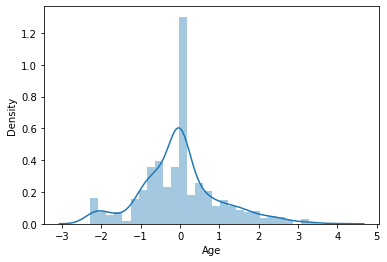

In [17]:
sns.distplot(titanic_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

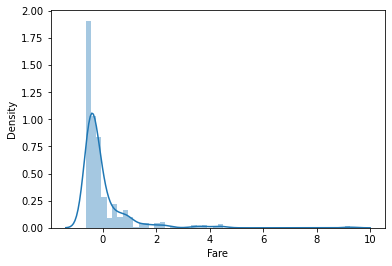

In [18]:
sns.distplot(titanic_data['Fare'])

## Get the train and test dataset

Although we can do a lot of more pre-processing on the data, such as discretization of continuous data, or outlier detection, we will stop here and generate the final train and test datasets by selecting appropiated columns

In [19]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,1.329138,0,0,152,-0.508463,76,Q,0,1,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.493840,1,0,221,-0.456499,76,S,1,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,-0.223797,0,0,73,-0.476318,76,Q,0,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,-0.612031,0,0,147,-0.406228,76,S,0,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-1.233205,1,1,138,-0.465442,76,S,1,0,0,0,1,0,0,1


In [20]:
#selected_x_columns = ['Age','SibSp','Parch','Ticket','Fare','Cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q' ]

selected_x_columns = ['Age','SibSp','Parch','Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3' ]
train_x = titanic_data[selected_x_columns]
test_x =  test_data[selected_x_columns]

train_y = titanic_data['Survived']


In [21]:
print(train_x.shape, test_x.shape)

(891, 9) (418, 9)


Let's generate a simple Keras model with a standard NN using the following layers 
Input Layer = 14
Hidden Layers = 30, 60, 30, 16
Output Layer = 1

We will use RELU activation for hidden layers and SIGMOID for output layer

We do not include neither dropout nor other reguralization techniques 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split



model = Sequential()
model.add(Dense(30, input_dim=train_x.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
...
# fit the keras model on the dataset
model.fit(train_x, train_y, validation_split=0.33, epochs=1500, batch_size=300)



Epoch 1/1500
2/2 [==============================] - 0s 147ms/step - loss: 0.6835 - accuracy: 0.5537 - val_loss: 0.6789 - val_accuracy: 0.6475
Epoch 2/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.6692 - accuracy: 0.6409 - val_loss: 0.6700 - val_accuracy: 0.6610
Epoch 3/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.6694 - accuracy: 0.6208 - val_loss: 0.6600 - val_accuracy: 0.6678
Epoch 4/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.6661 - accuracy: 0.6107 - val_loss: 0.6494 - val_accuracy: 0.6814
Epoch 5/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.6572 - accuracy: 0.6594 - val_loss: 0.6382 - val_accuracy: 0.6983
Epoch 6/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.6558 - accuracy: 0.6611 - val_loss: 0.6265 - val_accuracy: 0.6915
Epoch 7/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.6443 - accuracy: 0.6510 - val_loss: 0.6153 - val_accuracy: 0.6949
Epoch 8/1500

Epoch 59/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.4691 - accuracy: 0.7919 - val_loss: 0.4166 - val_accuracy: 0.8169
Epoch 60/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.4586 - accuracy: 0.8070 - val_loss: 0.4182 - val_accuracy: 0.8203
Epoch 61/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.4687 - accuracy: 0.7987 - val_loss: 0.4197 - val_accuracy: 0.8203
Epoch 62/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.4684 - accuracy: 0.8171 - val_loss: 0.4201 - val_accuracy: 0.8203
Epoch 63/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.4516 - accuracy: 0.8020 - val_loss: 0.4196 - val_accuracy: 0.8203
Epoch 64/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.4770 - accuracy: 0.7936 - val_loss: 0.4183 - val_accuracy: 0.8237
Epoch 65/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.4444 - accuracy: 0.8054 - val_loss: 0.4167 - val_accuracy: 0.8203
Epoch 

2/2 [==============================] - 0s 53ms/step - loss: 0.4451 - accuracy: 0.8238 - val_loss: 0.3947 - val_accuracy: 0.8441
Epoch 117/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.4325 - accuracy: 0.8255 - val_loss: 0.3959 - val_accuracy: 0.8441
Epoch 118/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.4326 - accuracy: 0.8188 - val_loss: 0.3968 - val_accuracy: 0.8441
Epoch 119/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.4271 - accuracy: 0.8104 - val_loss: 0.3974 - val_accuracy: 0.8441
Epoch 120/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.4200 - accuracy: 0.8054 - val_loss: 0.3979 - val_accuracy: 0.8441
Epoch 121/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.4580 - accuracy: 0.8020 - val_loss: 0.3994 - val_accuracy: 0.8441
Epoch 122/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.4383 - accuracy: 0.8121 - val_loss: 0.4003 - val_accuracy: 0.8407
Epoch 123/1500

2/2 [==============================] - 0s 38ms/step - loss: 0.4269 - accuracy: 0.8054 - val_loss: 0.3879 - val_accuracy: 0.8508
Epoch 174/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.4365 - accuracy: 0.8138 - val_loss: 0.3884 - val_accuracy: 0.8508
Epoch 175/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.4271 - accuracy: 0.8154 - val_loss: 0.3897 - val_accuracy: 0.8508
Epoch 176/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.4026 - accuracy: 0.8289 - val_loss: 0.3903 - val_accuracy: 0.8508
Epoch 177/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.4231 - accuracy: 0.8272 - val_loss: 0.3902 - val_accuracy: 0.8475
Epoch 178/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.4273 - accuracy: 0.8205 - val_loss: 0.3898 - val_accuracy: 0.8475
Epoch 179/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.4237 - accuracy: 0.8289 - val_loss: 0.3898 - val_accuracy: 0.8475
Epoch 180/1500

2/2 [==============================] - 0s 34ms/step - loss: 0.4176 - accuracy: 0.8221 - val_loss: 0.3836 - val_accuracy: 0.8407
Epoch 231/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.4111 - accuracy: 0.8205 - val_loss: 0.3845 - val_accuracy: 0.8407
Epoch 232/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.4211 - accuracy: 0.8305 - val_loss: 0.3856 - val_accuracy: 0.8441
Epoch 233/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.4041 - accuracy: 0.8322 - val_loss: 0.3854 - val_accuracy: 0.8441
Epoch 234/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.4060 - accuracy: 0.8289 - val_loss: 0.3850 - val_accuracy: 0.8441
Epoch 235/1500
2/2 [==============================] - 0s 23ms/step - loss: 0.4171 - accuracy: 0.8289 - val_loss: 0.3839 - val_accuracy: 0.8407
Epoch 236/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.4144 - accuracy: 0.8238 - val_loss: 0.3834 - val_accuracy: 0.8441
Epoch 237/1500

2/2 [==============================] - 0s 24ms/step - loss: 0.4292 - accuracy: 0.8238 - val_loss: 0.3765 - val_accuracy: 0.8508
Epoch 288/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3948 - accuracy: 0.8205 - val_loss: 0.3761 - val_accuracy: 0.8508
Epoch 289/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.4161 - accuracy: 0.8272 - val_loss: 0.3756 - val_accuracy: 0.8508
Epoch 290/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.3989 - accuracy: 0.8322 - val_loss: 0.3752 - val_accuracy: 0.8508
Epoch 291/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3996 - accuracy: 0.8238 - val_loss: 0.3747 - val_accuracy: 0.8475
Epoch 292/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.4039 - accuracy: 0.8289 - val_loss: 0.3746 - val_accuracy: 0.8475
Epoch 293/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.4171 - accuracy: 0.8037 - val_loss: 0.3746 - val_accuracy: 0.8475
Epoch 294/1500

2/2 [==============================] - 0s 36ms/step - loss: 0.3916 - accuracy: 0.8389 - val_loss: 0.3793 - val_accuracy: 0.8475
Epoch 345/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3952 - accuracy: 0.8473 - val_loss: 0.3798 - val_accuracy: 0.8475
Epoch 346/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3927 - accuracy: 0.8406 - val_loss: 0.3804 - val_accuracy: 0.8475
Epoch 347/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.4046 - accuracy: 0.8440 - val_loss: 0.3808 - val_accuracy: 0.8475
Epoch 348/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.4071 - accuracy: 0.8154 - val_loss: 0.3811 - val_accuracy: 0.8441
Epoch 349/1500
2/2 [==============================] - 0s 53ms/step - loss: 0.3943 - accuracy: 0.8322 - val_loss: 0.3810 - val_accuracy: 0.8441
Epoch 350/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3906 - accuracy: 0.8289 - val_loss: 0.3807 - val_accuracy: 0.8475
Epoch 351/1500

2/2 [==============================] - 0s 25ms/step - loss: 0.3821 - accuracy: 0.8406 - val_loss: 0.3854 - val_accuracy: 0.8339
Epoch 402/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3755 - accuracy: 0.8473 - val_loss: 0.3860 - val_accuracy: 0.8339
Epoch 403/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3963 - accuracy: 0.8423 - val_loss: 0.3865 - val_accuracy: 0.8373
Epoch 404/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.4011 - accuracy: 0.8289 - val_loss: 0.3872 - val_accuracy: 0.8373
Epoch 405/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3891 - accuracy: 0.8406 - val_loss: 0.3877 - val_accuracy: 0.8373
Epoch 406/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3882 - accuracy: 0.8356 - val_loss: 0.3878 - val_accuracy: 0.8373
Epoch 407/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.3772 - accuracy: 0.8389 - val_loss: 0.3877 - val_accuracy: 0.8407
Epoch 408/1500

2/2 [==============================] - 0s 35ms/step - loss: 0.3916 - accuracy: 0.8423 - val_loss: 0.3911 - val_accuracy: 0.8407
Epoch 459/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3834 - accuracy: 0.8440 - val_loss: 0.3912 - val_accuracy: 0.8407
Epoch 460/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.3795 - accuracy: 0.8356 - val_loss: 0.3912 - val_accuracy: 0.8441
Epoch 461/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3729 - accuracy: 0.8423 - val_loss: 0.3910 - val_accuracy: 0.8441
Epoch 462/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3649 - accuracy: 0.8473 - val_loss: 0.3905 - val_accuracy: 0.8441
Epoch 463/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3824 - accuracy: 0.8406 - val_loss: 0.3903 - val_accuracy: 0.8441
Epoch 464/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.3887 - accuracy: 0.8456 - val_loss: 0.3903 - val_accuracy: 0.8441
Epoch 465/1500

2/2 [==============================] - 0s 34ms/step - loss: 0.3800 - accuracy: 0.8406 - val_loss: 0.3931 - val_accuracy: 0.8441
Epoch 516/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3619 - accuracy: 0.8557 - val_loss: 0.3939 - val_accuracy: 0.8373
Epoch 517/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3910 - accuracy: 0.8356 - val_loss: 0.3940 - val_accuracy: 0.8373
Epoch 518/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3856 - accuracy: 0.8456 - val_loss: 0.3941 - val_accuracy: 0.8373
Epoch 519/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3787 - accuracy: 0.8372 - val_loss: 0.3948 - val_accuracy: 0.8373
Epoch 520/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3864 - accuracy: 0.8557 - val_loss: 0.3954 - val_accuracy: 0.8373
Epoch 521/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3759 - accuracy: 0.8389 - val_loss: 0.3961 - val_accuracy: 0.8339
Epoch 522/1500

2/2 [==============================] - 0s 39ms/step - loss: 0.3733 - accuracy: 0.8423 - val_loss: 0.3996 - val_accuracy: 0.8373
Epoch 573/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3829 - accuracy: 0.8540 - val_loss: 0.3995 - val_accuracy: 0.8373
Epoch 574/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.3746 - accuracy: 0.8389 - val_loss: 0.3995 - val_accuracy: 0.8373
Epoch 575/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3771 - accuracy: 0.8356 - val_loss: 0.3993 - val_accuracy: 0.8373
Epoch 576/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3750 - accuracy: 0.8372 - val_loss: 0.3995 - val_accuracy: 0.8339
Epoch 577/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3711 - accuracy: 0.8406 - val_loss: 0.3995 - val_accuracy: 0.8339
Epoch 578/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3697 - accuracy: 0.8473 - val_loss: 0.3993 - val_accuracy: 0.8305
Epoch 579/1500

2/2 [==============================] - 0s 54ms/step - loss: 0.3662 - accuracy: 0.8507 - val_loss: 0.4010 - val_accuracy: 0.8441
Epoch 630/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3632 - accuracy: 0.8557 - val_loss: 0.4007 - val_accuracy: 0.8441
Epoch 631/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.3696 - accuracy: 0.8490 - val_loss: 0.4012 - val_accuracy: 0.8441
Epoch 632/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3673 - accuracy: 0.8557 - val_loss: 0.4015 - val_accuracy: 0.8441
Epoch 633/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.3726 - accuracy: 0.8440 - val_loss: 0.4016 - val_accuracy: 0.8441
Epoch 634/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.3539 - accuracy: 0.8440 - val_loss: 0.4025 - val_accuracy: 0.8441
Epoch 635/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.3831 - accuracy: 0.8440 - val_loss: 0.4024 - val_accuracy: 0.8441
Epoch 636/1500

2/2 [==============================] - 0s 31ms/step - loss: 0.3465 - accuracy: 0.8641 - val_loss: 0.4113 - val_accuracy: 0.8271
Epoch 687/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.3842 - accuracy: 0.8356 - val_loss: 0.4113 - val_accuracy: 0.8305
Epoch 688/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3779 - accuracy: 0.8423 - val_loss: 0.4116 - val_accuracy: 0.8373
Epoch 689/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3669 - accuracy: 0.8389 - val_loss: 0.4121 - val_accuracy: 0.8305
Epoch 690/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3701 - accuracy: 0.8440 - val_loss: 0.4121 - val_accuracy: 0.8373
Epoch 691/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3464 - accuracy: 0.8557 - val_loss: 0.4115 - val_accuracy: 0.8373
Epoch 692/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.3612 - accuracy: 0.8423 - val_loss: 0.4108 - val_accuracy: 0.8373
Epoch 693/1500

2/2 [==============================] - 0s 41ms/step - loss: 0.3645 - accuracy: 0.8624 - val_loss: 0.4131 - val_accuracy: 0.8339
Epoch 744/1500
2/2 [==============================] - 0s 45ms/step - loss: 0.3788 - accuracy: 0.8507 - val_loss: 0.4133 - val_accuracy: 0.8305
Epoch 745/1500
2/2 [==============================] - 0s 47ms/step - loss: 0.3589 - accuracy: 0.8557 - val_loss: 0.4141 - val_accuracy: 0.8407
Epoch 746/1500
2/2 [==============================] - 0s 45ms/step - loss: 0.3521 - accuracy: 0.8574 - val_loss: 0.4154 - val_accuracy: 0.8373
Epoch 747/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3578 - accuracy: 0.8423 - val_loss: 0.4168 - val_accuracy: 0.8373
Epoch 748/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3555 - accuracy: 0.8507 - val_loss: 0.4183 - val_accuracy: 0.8373
Epoch 749/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.3407 - accuracy: 0.8658 - val_loss: 0.4191 - val_accuracy: 0.8373
Epoch 750/1500

2/2 [==============================] - 0s 33ms/step - loss: 0.3651 - accuracy: 0.8507 - val_loss: 0.4230 - val_accuracy: 0.8373
Epoch 801/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3498 - accuracy: 0.8456 - val_loss: 0.4232 - val_accuracy: 0.8339
Epoch 802/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.3614 - accuracy: 0.8557 - val_loss: 0.4243 - val_accuracy: 0.8339
Epoch 803/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.3737 - accuracy: 0.8591 - val_loss: 0.4249 - val_accuracy: 0.8339
Epoch 804/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3448 - accuracy: 0.8456 - val_loss: 0.4253 - val_accuracy: 0.8339
Epoch 805/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3509 - accuracy: 0.8456 - val_loss: 0.4260 - val_accuracy: 0.8373
Epoch 806/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3723 - accuracy: 0.8490 - val_loss: 0.4270 - val_accuracy: 0.8373
Epoch 807/1500

2/2 [==============================] - 0s 84ms/step - loss: 0.3538 - accuracy: 0.8490 - val_loss: 0.4280 - val_accuracy: 0.8339
Epoch 858/1500
2/2 [==============================] - 0s 49ms/step - loss: 0.3346 - accuracy: 0.8523 - val_loss: 0.4282 - val_accuracy: 0.8339
Epoch 859/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.3764 - accuracy: 0.8372 - val_loss: 0.4276 - val_accuracy: 0.8339
Epoch 860/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3433 - accuracy: 0.8758 - val_loss: 0.4276 - val_accuracy: 0.8339
Epoch 861/1500
2/2 [==============================] - 0s 49ms/step - loss: 0.3469 - accuracy: 0.8440 - val_loss: 0.4280 - val_accuracy: 0.8373
Epoch 862/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.3502 - accuracy: 0.8557 - val_loss: 0.4284 - val_accuracy: 0.8373
Epoch 863/1500
2/2 [==============================] - 0s 64ms/step - loss: 0.3413 - accuracy: 0.8574 - val_loss: 0.4287 - val_accuracy: 0.8373
Epoch 864/1500

2/2 [==============================] - 0s 43ms/step - loss: 0.3535 - accuracy: 0.8641 - val_loss: 0.4364 - val_accuracy: 0.8305
Epoch 915/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3551 - accuracy: 0.8523 - val_loss: 0.4364 - val_accuracy: 0.8305
Epoch 916/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.3524 - accuracy: 0.8523 - val_loss: 0.4365 - val_accuracy: 0.8305
Epoch 917/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.3469 - accuracy: 0.8557 - val_loss: 0.4373 - val_accuracy: 0.8305
Epoch 918/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.3439 - accuracy: 0.8473 - val_loss: 0.4376 - val_accuracy: 0.8305
Epoch 919/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.3432 - accuracy: 0.8557 - val_loss: 0.4388 - val_accuracy: 0.8305
Epoch 920/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3375 - accuracy: 0.8691 - val_loss: 0.4403 - val_accuracy: 0.8271
Epoch 921/1500

2/2 [==============================] - 0s 32ms/step - loss: 0.3379 - accuracy: 0.8574 - val_loss: 0.4503 - val_accuracy: 0.8305
Epoch 972/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.3336 - accuracy: 0.8658 - val_loss: 0.4501 - val_accuracy: 0.8305
Epoch 973/1500
2/2 [==============================] - 0s 43ms/step - loss: 0.3339 - accuracy: 0.8641 - val_loss: 0.4502 - val_accuracy: 0.8305
Epoch 974/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3486 - accuracy: 0.8658 - val_loss: 0.4506 - val_accuracy: 0.8305
Epoch 975/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3344 - accuracy: 0.8624 - val_loss: 0.4506 - val_accuracy: 0.8305
Epoch 976/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3522 - accuracy: 0.8607 - val_loss: 0.4506 - val_accuracy: 0.8305
Epoch 977/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3535 - accuracy: 0.8574 - val_loss: 0.4507 - val_accuracy: 0.8305
Epoch 978/1500

2/2 [==============================] - 0s 36ms/step - loss: 0.3447 - accuracy: 0.8540 - val_loss: 0.4494 - val_accuracy: 0.8339
Epoch 1029/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3569 - accuracy: 0.8624 - val_loss: 0.4478 - val_accuracy: 0.8339
Epoch 1030/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3420 - accuracy: 0.8658 - val_loss: 0.4470 - val_accuracy: 0.8339
Epoch 1031/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.3367 - accuracy: 0.8574 - val_loss: 0.4473 - val_accuracy: 0.8305
Epoch 1032/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.3500 - accuracy: 0.8507 - val_loss: 0.4480 - val_accuracy: 0.8305
Epoch 1033/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3509 - accuracy: 0.8591 - val_loss: 0.4487 - val_accuracy: 0.8305
Epoch 1034/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3496 - accuracy: 0.8507 - val_loss: 0.4491 - val_accuracy: 0.8305
Epoch 10

2/2 [==============================] - 0s 33ms/step - loss: 0.3186 - accuracy: 0.8674 - val_loss: 0.4629 - val_accuracy: 0.8271
Epoch 1086/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.3485 - accuracy: 0.8574 - val_loss: 0.4634 - val_accuracy: 0.8271
Epoch 1087/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3209 - accuracy: 0.8607 - val_loss: 0.4644 - val_accuracy: 0.8271
Epoch 1088/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3439 - accuracy: 0.8607 - val_loss: 0.4666 - val_accuracy: 0.8237
Epoch 1089/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.3330 - accuracy: 0.8523 - val_loss: 0.4679 - val_accuracy: 0.8237
Epoch 1090/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3289 - accuracy: 0.8708 - val_loss: 0.4680 - val_accuracy: 0.8271
Epoch 1091/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3336 - accuracy: 0.8641 - val_loss: 0.4676 - val_accuracy: 0.8271
Epoch 10

2/2 [==============================] - 0s 37ms/step - loss: 0.3128 - accuracy: 0.8742 - val_loss: 0.4659 - val_accuracy: 0.8305
Epoch 1143/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.3333 - accuracy: 0.8641 - val_loss: 0.4667 - val_accuracy: 0.8339
Epoch 1144/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3454 - accuracy: 0.8540 - val_loss: 0.4684 - val_accuracy: 0.8305
Epoch 1145/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.3307 - accuracy: 0.8758 - val_loss: 0.4689 - val_accuracy: 0.8305
Epoch 1146/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.3520 - accuracy: 0.8574 - val_loss: 0.4683 - val_accuracy: 0.8305
Epoch 1147/1500
2/2 [==============================] - 0s 22ms/step - loss: 0.3145 - accuracy: 0.8674 - val_loss: 0.4680 - val_accuracy: 0.8305
Epoch 1148/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.3211 - accuracy: 0.8742 - val_loss: 0.4679 - val_accuracy: 0.8305
Epoch 11

2/2 [==============================] - 0s 26ms/step - loss: 0.3237 - accuracy: 0.8658 - val_loss: 0.4671 - val_accuracy: 0.8339
Epoch 1200/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.3219 - accuracy: 0.8641 - val_loss: 0.4670 - val_accuracy: 0.8373
Epoch 1201/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.3500 - accuracy: 0.8490 - val_loss: 0.4672 - val_accuracy: 0.8373
Epoch 1202/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3298 - accuracy: 0.8658 - val_loss: 0.4674 - val_accuracy: 0.8339
Epoch 1203/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.3458 - accuracy: 0.8574 - val_loss: 0.4681 - val_accuracy: 0.8339
Epoch 1204/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3296 - accuracy: 0.8557 - val_loss: 0.4667 - val_accuracy: 0.8339
Epoch 1205/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.3186 - accuracy: 0.8725 - val_loss: 0.4663 - val_accuracy: 0.8305
Epoch 12

2/2 [==============================] - 0s 34ms/step - loss: 0.3351 - accuracy: 0.8641 - val_loss: 0.4730 - val_accuracy: 0.8271
Epoch 1257/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.3315 - accuracy: 0.8725 - val_loss: 0.4713 - val_accuracy: 0.8407
Epoch 1258/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.3383 - accuracy: 0.8607 - val_loss: 0.4696 - val_accuracy: 0.8407
Epoch 1259/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3224 - accuracy: 0.8842 - val_loss: 0.4695 - val_accuracy: 0.8407
Epoch 1260/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.3338 - accuracy: 0.8725 - val_loss: 0.4703 - val_accuracy: 0.8407
Epoch 1261/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.3236 - accuracy: 0.8574 - val_loss: 0.4724 - val_accuracy: 0.8407
Epoch 1262/1500
2/2 [==============================] - 0s 53ms/step - loss: 0.3323 - accuracy: 0.8591 - val_loss: 0.4757 - val_accuracy: 0.8305
Epoch 12

2/2 [==============================] - 0s 38ms/step - loss: 0.3141 - accuracy: 0.8591 - val_loss: 0.4811 - val_accuracy: 0.8441
Epoch 1314/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3289 - accuracy: 0.8624 - val_loss: 0.4823 - val_accuracy: 0.8407
Epoch 1315/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3371 - accuracy: 0.8540 - val_loss: 0.4832 - val_accuracy: 0.8407
Epoch 1316/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3301 - accuracy: 0.8540 - val_loss: 0.4841 - val_accuracy: 0.8373
Epoch 1317/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.3510 - accuracy: 0.8641 - val_loss: 0.4843 - val_accuracy: 0.8339
Epoch 1318/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3275 - accuracy: 0.8574 - val_loss: 0.4834 - val_accuracy: 0.8305
Epoch 1319/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3435 - accuracy: 0.8557 - val_loss: 0.4829 - val_accuracy: 0.8339
Epoch 13

Epoch 1370/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.3338 - accuracy: 0.8725 - val_loss: 0.4911 - val_accuracy: 0.8407
Epoch 1371/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.3147 - accuracy: 0.8708 - val_loss: 0.4892 - val_accuracy: 0.8407
Epoch 1372/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3347 - accuracy: 0.8674 - val_loss: 0.4869 - val_accuracy: 0.8407
Epoch 1373/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.3115 - accuracy: 0.8674 - val_loss: 0.4858 - val_accuracy: 0.8407
Epoch 1374/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.3244 - accuracy: 0.8674 - val_loss: 0.4866 - val_accuracy: 0.8373
Epoch 1375/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3159 - accuracy: 0.8742 - val_loss: 0.4889 - val_accuracy: 0.8407
Epoch 1376/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.3279 - accuracy: 0.8674 - val_loss: 0.4913 - val_accuracy:

Epoch 1427/1500
2/2 [==============================] - 0s 24ms/step - loss: 0.3202 - accuracy: 0.8641 - val_loss: 0.4864 - val_accuracy: 0.8407
Epoch 1428/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.3151 - accuracy: 0.8691 - val_loss: 0.4882 - val_accuracy: 0.8373
Epoch 1429/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.3212 - accuracy: 0.8641 - val_loss: 0.4896 - val_accuracy: 0.8441
Epoch 1430/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.3184 - accuracy: 0.8742 - val_loss: 0.4911 - val_accuracy: 0.8441
Epoch 1431/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.3122 - accuracy: 0.8725 - val_loss: 0.4922 - val_accuracy: 0.8407
Epoch 1432/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.3197 - accuracy: 0.8725 - val_loss: 0.4923 - val_accuracy: 0.8339
Epoch 1433/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.3063 - accuracy: 0.8591 - val_loss: 0.4941 - val_accuracy:

Epoch 1484/1500
2/2 [==============================] - 0s 46ms/step - loss: 0.3014 - accuracy: 0.8758 - val_loss: 0.4923 - val_accuracy: 0.8373
Epoch 1485/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.3154 - accuracy: 0.8658 - val_loss: 0.4946 - val_accuracy: 0.8373
Epoch 1486/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3184 - accuracy: 0.8658 - val_loss: 0.4981 - val_accuracy: 0.8373
Epoch 1487/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.3109 - accuracy: 0.8725 - val_loss: 0.5003 - val_accuracy: 0.8339
Epoch 1488/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.3119 - accuracy: 0.8742 - val_loss: 0.5030 - val_accuracy: 0.8407
Epoch 1489/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.3105 - accuracy: 0.8842 - val_loss: 0.5044 - val_accuracy: 0.8407
Epoch 1490/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.3322 - accuracy: 0.8607 - val_loss: 0.5054 - val_accuracy:

In [23]:

test_y = model.predict(test_x)
test_y = np.where(test_y>0.8, 1,0)



<ipython-input-23-c717474fcf93>:2: RuntimeWarning: invalid value encountered in greater
  test_y = np.where(test_y>0.8, 1,0)


In [24]:
test_y.shape

(418, 1)

In [25]:
result = test_data.join(pd.DataFrame(test_y, columns=['Survived']))
result = result[['PassengerId', 'Survived']]

In [26]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


We got it. Let's submit our results

In [27]:
result.to_csv('submission.csv', index=False)